## Caso Práctico GNN's

### Objetivo
Desarrollar un modelo de Graph Neural Network (GNN) para recomendar seguimientos en una red social de música, utilizando un dataset creado por el equipo.

1. Carga de librerías a utilizar
 Esta sección se encarga de importar las librerías necesarias para el análisis y visualización de datos.
 - `pandas` se usa para la manipulación y análisis de datos en formato tabular.
 - `matplotlib.pyplot` se usa para la creación de gráficos y visualizaciones.
 - `networkx` se usa para la creación, manipulación y estudio de la estructura, dinámica y funciones de redes complejas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

2. Carga del dataset
En esta sección se carga el conjunto de datos desde un archivo CSV utilizando la librería `pandas`.
El archivo 'Dataset_GNN-Pt1.csv' debe estar ubicado en la ruta especificada.
Se utiliza la función `read_csv` de `pandas` para leer el archivo y crear un DataFrame llamado `df`.

In [2]:
df = pd.read_csv('/home/jesus_gh/MetodosBiomAI/CasoPractico_5/Dataset_GNN-Pt1.csv')
df.head()

,user_name,follows_who,saved_playlists
0,Alberto Flores,Carmen Perez,5
1,Alejandra Herrera,Valeria Sierra,7
2,Alicia Morales,Romina Grijalva,8
3,Ana Garcia,Cristina Castro,4
4,Andres Diaz,Diego Fernandez,1


3. Craer un grafo vacío
Esta sección crea un grafo dirigido vacío utilizando la librería `networkx`.
Se utiliza la clase `DiGraph` para representar el grafo dirigido.
Posteriormente, el grafo se construye a partir del DataFrame `df` utilizando la función `from_pandas_edgelist`.
Se definen las columnas 'user_name' y 'follows_who' como origen y destino de las aristas, respectivamente.
La columna 'saved_playlists' se utiliza como atributo de las aristas.


In [3]:
# Crear un grafo dirigido
G = nx.from_pandas_edgelist(df, source='user_name', target='follows_who', edge_attr='saved_playlists', create_using=nx.DiGraph())

# Verificar el tipo de grafo
print(type(G))

<class 'networkx.classes.digraph.DiGraph'>


5. Configurar el Layout
Esta sección define la disposición espacial de los nodos en la visualización del grafo.
Se utiliza la función `spring_layout` de `networkx` para generar un diseño en el que los nodos se repelen entre sí y las aristas actúan como resortes.
El resultado se almacena en la variable `lo`.

In [4]:
# Layout del grafo, donde k es la distancia entre los nodos y
#  spring_layout es un algoritmo de posicionamiento
lo = nx.spring_layout(G, k=0.7)

6. Definir pesos de las aristas
Esta sección calcula los pesos de las aristas del grafo a partir del atributo 'saved_playlists'.
Los pesos se normalizan dividiendo cada valor entre 5.
El resultado se almacena en la variable `weights`.

In [5]:
# Defino los pesos de las aristas y su grosor
weights = list(nx.get_edge_attributes(G, 'saved_playlists').values())
weights = [i / 10 for i in weights]

8. Visualizar nodos, aristas y etiquetas.
Esta sección se encarga de visualizar el grafo utilizando las funciones de `networkx` y `matplotlib.pyplot`.
Se dibujan los nodos, las aristas y las etiquetas utilizando las funciones `draw_networkx_nodes`, `draw_networkx_edges` y `draw_networkx_labels`, respectivamente.
Se configuran parámetros como el tamaño de los nodos, la transparencia, el tamaño de las flechas, el grosor de las aristas y el tamaño de la fuente de las etiquetas.
Finalmente, se muestra el gráfico utilizando la función `plt.show()`.

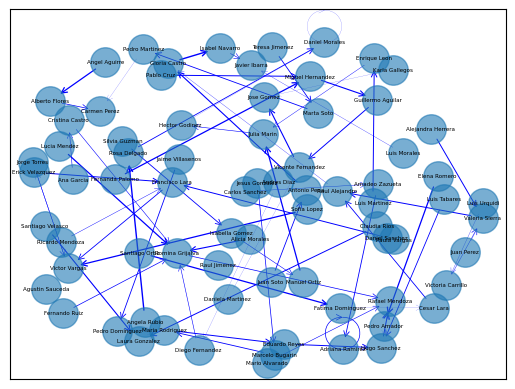

In [6]:
# Dibujo el grafo con los nodos, aristas y etiquetas
nx.draw_networkx_nodes(G, lo, node_size=450, alpha=0.6, nodelist=G.nodes(),margins=0.00001)
nx.draw_networkx_edges(G, lo, arrowsize=10, width=weights, arrows=True, arrowstyle='->', edge_color='b')
nx.draw_networkx_labels(G, lo, font_size=4, font_family='sans-serif')
plt.show()


9. Calcular coeficientes de Jaccard para todas las parejas posibles. El coeficiente de Jaccard es una medida de similitud entre dos conjuntos, definida como el tamaño de la intersección dividido por el tamaño de la unión de los conjuntos. En el contexto de redes, se utiliza para medir la similitud entre los conjuntos de vecinos de dos nodos. 

Al calcular estos coeficientes para todas las parejas posibles de nodos en el grafo no dirigido, podemos identificar pares de nodos que tienen muchos vecinos en común y, por lo tanto, podrían beneficiarse de una conexión.

Mostrar recomendaciones con mejores scores. Después de calcular los coeficientes de Jaccard, ordenamos las parejas de nodos por su puntuación en orden descendente y mostramos las 10 mejores recomendaciones. Estas recomendaciones sugieren qué usuarios podrían seguir a otros usuarios en función de la similitud de sus conexiones existentes. Esto es útil en aplicaciones como redes sociales, donde queremos sugerir nuevas conexiones a los usuarios basándonos en sus intereses comunes.

In [7]:
# Convertir el grafo dirigido en uno no dirigido
G_undirected = G.to_undirected()

# Calcular coeficientes de Jaccard para todas las parejas posibles
jaccard_scores = list(nx.jaccard_coefficient(G_undirected))

# Mostrar recomendaciones con mejores scores
print("Recomendaciones basadas en Jaccard Coefficient:")
for u, v, p in sorted(jaccard_scores, key=lambda x: -x[2])[:10]:
    print(f"Usuario {u} podría seguir a {v} (score: {p:.2f})")

Recomendaciones basadas en Jaccard Coefficient:
Usuario Alejandra Herrera podría seguir a Juan Perez (score: 1.00)
Usuario Santiago Velasco podría seguir a Claudia Rios (score: 1.00)
Usuario Ricardo Mendoza podría seguir a Erick Velazquez (score: 1.00)
Usuario Ricardo Mendoza podría seguir a Paula Vargas (score: 1.00)
Usuario Paula Vargas podría seguir a Erick Velazquez (score: 1.00)
Usuario Fernanda Palomo podría seguir a Pablo Cruz (score: 1.00)
Usuario Alejandra Herrera podría seguir a Victoria Carrillo (score: 0.50)
Usuario Pedro Amador podría seguir a Mario Alvarado (score: 0.50)
Usuario Jorge Torres podría seguir a Sofia Lopez (score: 0.50)
Usuario Silvia Guzman podría seguir a Manuel Ortiz (score: 0.50)


10. Tamaño de nodos según grado y detección de comunidades
En esta sección, se ajusta el tamaño de los nodos en función de su grado y se detectan las comunidades dentro del grafo utilizando el algoritmo de modularidad de NetworkX. Luego, se redibuja el grafo con colores y tamaños de nodos ajustados.


El tamaño de cada nodo se determina en función de su grado (degree). El grado de un nodo es el número de conexiones (aristas) que tiene con otros nodos. Multiplicamos el grado por 100 para escalar los tamaños y hacerlos más visibles en el gráfico.

Los colores de los nodos se asignan en función de las comunidades a las que pertenecen. 
Utilizamos el algoritmo greedy_modularity_communities de NetworkX para detectar comunidades en el grafo G.
Cada comunidad es un conjunto de nodos que están más densamente conectados entre sí que con el resto del grafo
* communities es una lista de conjuntos, donde cada conjunto representa una comunidad.
* node_colors es una lista que asigna un color a cada nodo según la comunidad a la que pertenece. El índice i de la comunidad se usa como el color del nodo.


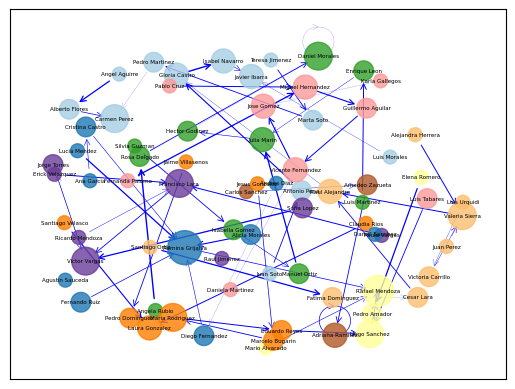

In [8]:
# Tamaño de nodos según grado
node_sizes = [G.degree(node) * 100 for node in G.nodes()]

# Detectar comunidades
from networkx.algorithms import community
communities = list(community.greedy_modularity_communities(G))
node_colors = []
for node in G.nodes():
    for i, comm in enumerate(communities):
        if node in comm:
            node_colors.append(i)

# Redibujar con colores y tamaños
nx.draw_networkx_nodes(G, lo, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Paired, alpha=0.8)
nx.draw_networkx_edges(G, lo, arrowsize=10, width=weights, arrows=True, arrowstyle='->', edge_color='b')
nx.draw_networkx_labels(G, lo, font_size=4, font_family='sans-serif')
plt.show()